# MNIST without Drop-out

### Importing packages
    - We only need these more additional package 

In [35]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


### Initializations and Loadings the data.

In [36]:
# Load data from keras.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
# Reshaping and Flattening the data.

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [38]:
# Using one-hot coding 

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### Constructing the model using Keras framework

In [39]:
# Building the model network.

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [40]:
# Compiling the model.

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# I could use Stochastic Gradient Descent or Adam optimizer, which adam in faster

### Fitting the data to the model and trainning.

In [41]:
# training the model and saving metrics in history

history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.2223 - accuracy: 0.9344 - val_loss: 0.1132 - val_accuracy: 0.9630
Epoch 2/20
 - 4s - loss: 0.0814 - accuracy: 0.9742 - val_loss: 0.0791 - val_accuracy: 0.9735
Epoch 3/20
 - 3s - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0709 - val_accuracy: 0.9774
Epoch 4/20
 - 3s - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.0673 - val_accuracy: 0.9803
Epoch 5/20
 - 3s - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0882 - val_accuracy: 0.9735
Epoch 6/20
 - 3s - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0684 - val_accuracy: 0.9821
Epoch 7/20
 - 3s - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 8/20
 - 3s - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0764 - val_accuracy: 0.9800
Epoch 9/20
 - 3s - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0765 - val_accuracy: 0.9819
Epoch 10/20
 - 3s - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0816 - val_accuracy: 0.9808
Epoch 11/20
 - 3s -

### Plotting the results

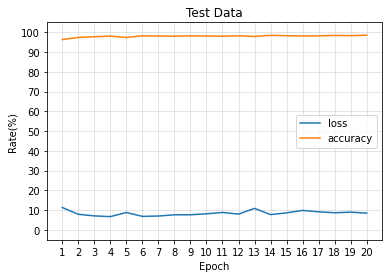

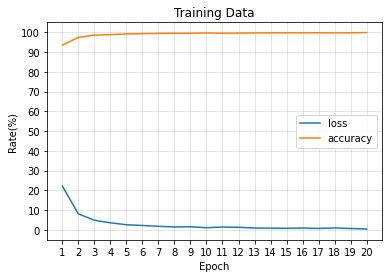

In [42]:
# plotting the metrics
fig, ax = plt.subplots()
x = range(1,len(history.history['loss'])+1)
y = range(0,101,10)
ax.grid(color='gray', alpha=0.25)
ax.set_axisbelow(True)
plt.title("Test Data")
plt.xlabel("Epoch")
plt.ylabel("Rate(%)")
plt.xticks(x)
plt.yticks(y)
plt.ylim(-5,105)
ax.plot(x,100*np.array(history.history['val_loss']), label= 'loss')
ax.plot(x,100*np.array(history.history['val_accuracy']), label='accuracy')
ax.legend()
plt.show()
fig, ax = plt.subplots()
ax.grid(color='gray', alpha=0.25)
ax.set_axisbelow(True)
plt.title("Training Data")
plt.xlabel("Epoch")
plt.ylabel("Rate(%)")
plt.xticks(x)
plt.yticks(y)
plt.ylim(-5,105)
ax.plot(x,100*np.array(history.history['loss']), label= 'loss')
ax.plot(x,100*np.array(history.history['accuracy']), label='accuracy')
ax.legend()
plt.show()

# MNIST with Drop-out

### changing the model to use dropout.

In [43]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.8))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.8))

model.add(Dense(10))
model.add(Activation('softmax'))

### Compiling and Fitting the data to model.

In [44]:
# Compiling the model.

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [45]:
# Fitting the model.

history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.7917 - accuracy: 0.7451 - val_loss: 0.2331 - val_accuracy: 0.9299
Epoch 2/20
 - 3s - loss: 0.4008 - accuracy: 0.8819 - val_loss: 0.1746 - val_accuracy: 0.9487
Epoch 3/20
 - 3s - loss: 0.3370 - accuracy: 0.9030 - val_loss: 0.1539 - val_accuracy: 0.9551
Epoch 4/20
 - 3s - loss: 0.3036 - accuracy: 0.9141 - val_loss: 0.1349 - val_accuracy: 0.9603
Epoch 5/20
 - 3s - loss: 0.2832 - accuracy: 0.9190 - val_loss: 0.1253 - val_accuracy: 0.9622
Epoch 6/20
 - 3s - loss: 0.2662 - accuracy: 0.9239 - val_loss: 0.1221 - val_accuracy: 0.9657
Epoch 7/20
 - 3s - loss: 0.2495 - accuracy: 0.9291 - val_loss: 0.1156 - val_accuracy: 0.9672
Epoch 8/20
 - 3s - loss: 0.2413 - accuracy: 0.9307 - val_loss: 0.1112 - val_accuracy: 0.9674
Epoch 9/20
 - 3s - loss: 0.2365 - accuracy: 0.9326 - val_loss: 0.1096 - val_accuracy: 0.9688
Epoch 10/20
 - 3s - loss: 0.2299 - accuracy: 0.9344 - val_loss: 0.1045 - val_accuracy: 0.9684
Epoch 11/20
 - 3s -

### Plotting the result

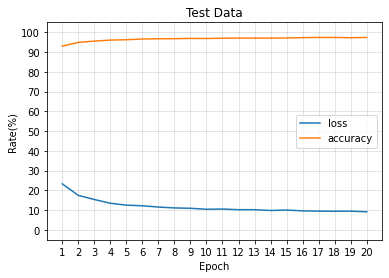

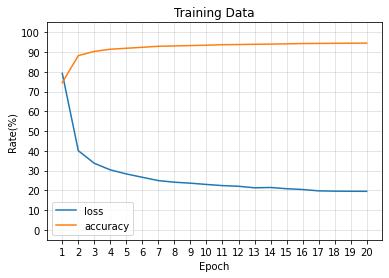

In [46]:
# plotting the metrics

fig, ax = plt.subplots()
x = range(1,len(history.history['loss'])+1)
y = range(0,101,10)
ax.grid(color='gray', alpha=0.25)
ax.set_axisbelow(True)
plt.title("Test Data")
plt.xlabel("Epoch")
plt.ylabel("Rate(%)")
plt.xticks(x)
plt.yticks(y)
plt.ylim(-5,105)
ax.plot(x,100*np.array(history.history['val_loss']), label= 'loss')
ax.plot(x,100*np.array(history.history['val_accuracy']), label='accuracy')
ax.legend()
plt.show()
fig, ax = plt.subplots()
ax.grid(color='gray', alpha=0.25)
ax.set_axisbelow(True)
plt.title("Training Data")
plt.xlabel("Epoch")
plt.ylabel("Rate(%)")
plt.xticks(x)
plt.yticks(y)
plt.ylim(-5,105)
ax.plot(x,100*np.array(history.history['loss']), label= 'loss')
ax.plot(x,100*np.array(history.history['accuracy']), label='accuracy')
ax.legend()
plt.show()

### Explaination of Dropout
    - When using dropout, we turn neurons off by a keep_probs ratio, So the model is less likely to overfit the data,
    So difference between accuracy on test and trainning set would be smaller.
    Here I used a 80% dropout rate for example.